In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import sem
import numpy as np
import requests
import json

In [2]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# Kaggle

link: https://www.kaggle.com/anikannal/solar-power-generation-data

Description: This data has been gathered at two solar power plants in India over a 34 day period. It has two pairs of files - each pair has one power generation dataset and one sensor readings dataset. The power generation datasets are gathered at the inverter level - each inverter has multiple lines of solar panels attached to it. The sensor data is gathered at a plant level - single array of sensors optimally placed at the plant.

### Kaggle Dataset 1

In [3]:
plant1_gen = pd.read_csv('./Resources/Kaggle/Plant_1_Generation_Data.csv')
plant1_gen

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.00000,0.00000,0.00000,6259559.00000
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.00000,0.00000,0.00000,6183645.00000
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.00000,0.00000,0.00000,6987759.00000
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.00000,0.00000,0.00000,7602960.00000
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.00000,0.00000,0.00000,7158964.00000
...,...,...,...,...,...,...,...
68773,17-06-2020 23:45,4135001,uHbuxQJl8lW7ozc,0.00000,0.00000,5967.00000,7287002.00000
68774,17-06-2020 23:45,4135001,wCURE6d3bPkepu2,0.00000,0.00000,5147.62500,7028601.00000
68775,17-06-2020 23:45,4135001,z9Y9gH1T5YWrNuG,0.00000,0.00000,5819.00000,7251204.00000
68776,17-06-2020 23:45,4135001,zBIq5rxdHJRwDNY,0.00000,0.00000,5817.00000,6583369.00000


In [4]:
plant1_gen['DATE_TIME'] = pd.to_datetime(plant1_gen['DATE_TIME'], dayfirst=True)

In [5]:
plant2_gen = pd.read_csv('./Resources/Kaggle/Plant_2_Generation_Data.csv')
plant2_gen

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.00000,0.00000,9425.00000,2429011.00000
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.00000,0.00000,0.00000,1215278736.00000
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.00000,0.00000,3075.33333,2247719577.00000
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.00000,0.00000,269.93333,1704250.00000
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.00000,0.00000,3177.00000,19941526.00000
...,...,...,...,...,...,...,...
67693,2020-06-17 23:45:00,4136001,q49J1IKaHRwDQnt,0.00000,0.00000,4157.00000,520758.00000
67694,2020-06-17 23:45:00,4136001,rrq4fwE8jgrTyWY,0.00000,0.00000,3931.00000,121131356.00000
67695,2020-06-17 23:45:00,4136001,vOuJvMaM2sgwLmb,0.00000,0.00000,4322.00000,2427691.00000
67696,2020-06-17 23:45:00,4136001,xMbIugepa2P7lBB,0.00000,0.00000,4218.00000,106896394.00000


In [6]:
plant2_gen['DATE_TIME'] = pd.to_datetime(plant2_gen['DATE_TIME'], yearfirst=True)

#### Synopsis1 from Kaggle Dataset

**General info:**<br>
Duration: 34 day period
Location: India
<br>
**Generation Data:** <br>
*'...datasets are gathered at the inverter level - each inverter has multiple lines of solar panels attached to it'* <br>
SOURCE_KEY 22 unique = 22 Inverter from both plants
AC/DC 0 value above 50%
<br>
**Sensor Data:** <br>
*'...single array of sensors optimally placed at the plant'*
SOURCE_KEY 1 unique = 22 Inverter from both plants

In [56]:
GenCombined = plant2_gen.merge(plant1_gen, how="outer")
GenCombined

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.00000,0.00000,9425.00000,2429011.00000
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.00000,0.00000,0.00000,1215278736.00000
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.00000,0.00000,3075.33333,2247719577.00000
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.00000,0.00000,269.93333,1704250.00000
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.00000,0.00000,3177.00000,19941526.00000
...,...,...,...,...,...,...,...
136471,2020-06-17 23:45:00,4135001,uHbuxQJl8lW7ozc,0.00000,0.00000,5967.00000,7287002.00000
136472,2020-06-17 23:45:00,4135001,wCURE6d3bPkepu2,0.00000,0.00000,5147.62500,7028601.00000
136473,2020-06-17 23:45:00,4135001,z9Y9gH1T5YWrNuG,0.00000,0.00000,5819.00000,7251204.00000
136474,2020-06-17 23:45:00,4135001,zBIq5rxdHJRwDNY,0.00000,0.00000,5817.00000,6583369.00000


In [57]:
GenCombined = GenCombined.rename(columns={'SOURCE_KEY': 'INVERTER_KEY'})

array([[<AxesSubplot:title={'center':'DATE_TIME'}>,
        <AxesSubplot:title={'center':'PLANT_ID'}>],
       [<AxesSubplot:title={'center':'DC_POWER'}>,
        <AxesSubplot:title={'center':'AC_POWER'}>],
       [<AxesSubplot:title={'center':'DAILY_YIELD'}>,
        <AxesSubplot:title={'center':'TOTAL_YIELD'}>]], dtype=object)

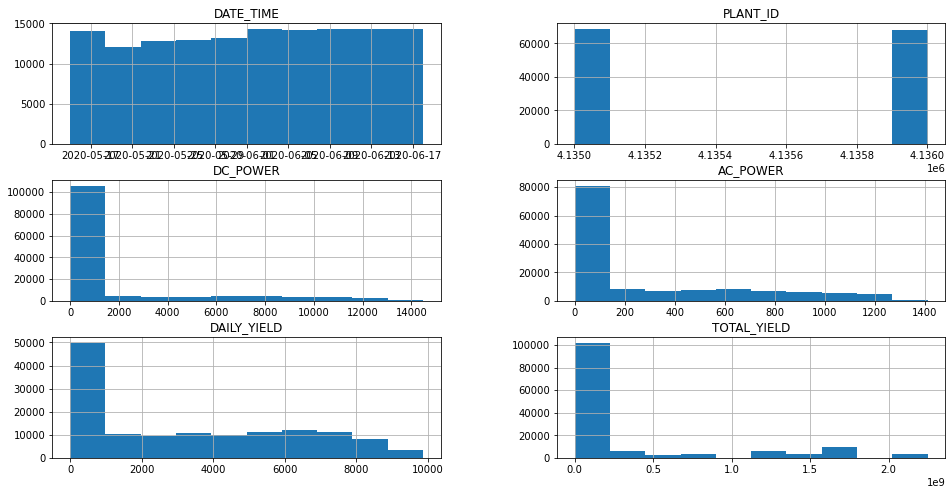

In [58]:
GenCombined.hist(figsize=(16,8))

In [59]:
ACDCdf = GenCombined.copy().drop(columns=['TOTAL_YIELD','DAILY_YIELD'])
ACDCdf

,DATE_TIME,PLANT_ID,INVERTER_KEY,DC_POWER,AC_POWER
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.00000,0.00000
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.00000,0.00000
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.00000,0.00000
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.00000,0.00000
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.00000,0.00000
...,...,...,...,...,...
136471,2020-06-17 23:45:00,4135001,uHbuxQJl8lW7ozc,0.00000,0.00000
136472,2020-06-17 23:45:00,4135001,wCURE6d3bPkepu2,0.00000,0.00000
136473,2020-06-17 23:45:00,4135001,z9Y9gH1T5YWrNuG,0.00000,0.00000
136474,2020-06-17 23:45:00,4135001,zBIq5rxdHJRwDNY,0.00000,0.00000


In [60]:
DConly = ACDCdf['DC_POWER'].sort_values()
AConly = ACDCdf['AC_POWER'].sort_values()

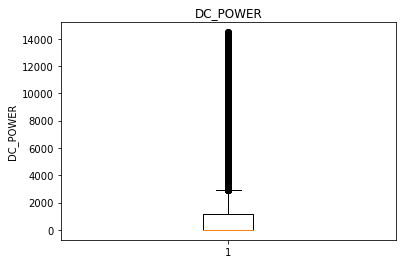

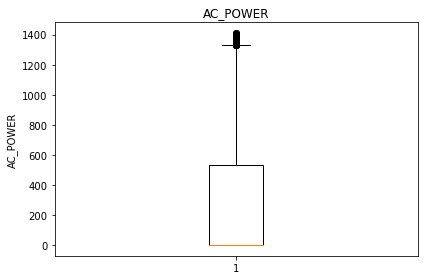

In [61]:
fig1, ax1= plt.subplots()
ax1.set_title('DC_POWER')
ax1.set_ylabel('DC_POWER')
ax1.boxplot(DConly)
fig1, ax2= plt.subplots()
ax2.set_title('AC_POWER')
ax2.set_ylabel('AC_POWER')
ax2.boxplot(AConly)
plt.tight_layout()
plt.show()

In [62]:
z_scipy = sts.zscore(DConly)
z_scipy2 = sts.zscore(AConly)

print(f" z-scores for DC_POWER {z_scipy}")
print(f" z-scores deviation for AC_POWER {z_scipy2}")

 z-scores for DC_POWER [-0.5302457  -0.5302457  -0.5302457  ...  3.95005425  3.95954209
  3.96086662]
 z-scores deviation for AC_POWER [-0.72282251 -0.72282251 -0.72282251 ...  2.97947246  2.98732586
  2.98843436]


In [63]:
cleanACDC = ACDCdf.loc[ACDCdf['AC_POWER']!=0]
cleanACDC = ACDCdf.loc[ACDCdf['DC_POWER']!=0]

In [64]:
DC = cleanACDC['DC_POWER'].sort_values()
AC = cleanACDC['AC_POWER'].sort_values()

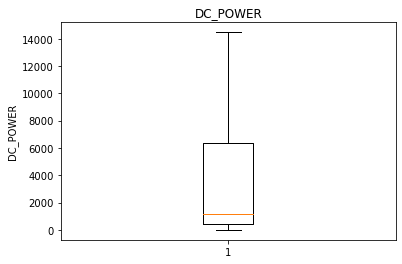

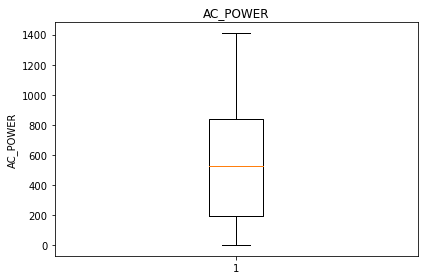

In [65]:
fig1, ax1= plt.subplots()
ax1.set_title('DC_POWER')
ax1.set_ylabel('DC_POWER')
ax1.boxplot(DC)
fig1, ax2= plt.subplots()
ax2.set_title('AC_POWER')
ax2.set_ylabel('AC_POWER')
ax2.boxplot(AC)
plt.tight_layout()
plt.show()

In [66]:
# DATE_TIME = cleanACDC['DATE_TIME']
# PLANT_ID = cleanACDC['PLANT_ID']
# SOURCE_KEY = cleanACDC['SOURCE_KEY']

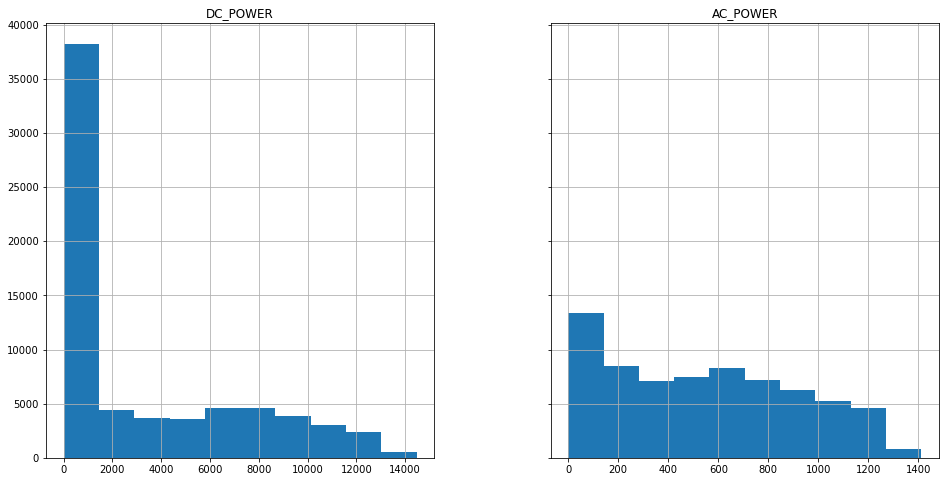

In [67]:
cleanACDC.hist(column=['DC_POWER','AC_POWER'], figsize=(16,8),sharey=True)
plt.show()

In [68]:
cleanACDC

,DATE_TIME,PLANT_ID,INVERTER_KEY,DC_POWER,AC_POWER
528,2020-05-15 06:00:00,4136001,4UPUqMRk7TRMgml,15.40667,14.86000
529,2020-05-15 06:00:00,4136001,81aHJ1q11NBPMrL,14.77333,14.24667
530,2020-05-15 06:00:00,4136001,9kRcWv60rDACzjR,15.38000,14.84000
531,2020-05-15 06:00:00,4136001,Et9kgGMDl729KT4,14.97333,14.44000
532,2020-05-15 06:00:00,4136001,IQ2d7wF4YD8zU1Q,15.16000,14.63333
...,...,...,...,...,...
136009,2020-06-17 18:30:00,4135001,uHbuxQJl8lW7ozc,79.00000,7.61429
136010,2020-06-17 18:30:00,4135001,wCURE6d3bPkepu2,75.71429,7.30000
136011,2020-06-17 18:30:00,4135001,z9Y9gH1T5YWrNuG,77.42857,7.47143
136012,2020-06-17 18:30:00,4135001,zBIq5rxdHJRwDNY,74.85714,7.22857


In [69]:
updatedACDC = cleanACDC.copy()

In [70]:
position = cleanACDC.columns.get_loc('DATE_TIME')
updatedACDC['elapsed'] =  cleanACDC.iloc[1:, position] - cleanACDC.iat[0, position]

In [71]:
updatedACDC

,DATE_TIME,PLANT_ID,INVERTER_KEY,DC_POWER,AC_POWER,elapsed
528,2020-05-15 06:00:00,4136001,4UPUqMRk7TRMgml,15.40667,14.86000,NaT
529,2020-05-15 06:00:00,4136001,81aHJ1q11NBPMrL,14.77333,14.24667,0 days 00:00:00
530,2020-05-15 06:00:00,4136001,9kRcWv60rDACzjR,15.38000,14.84000,0 days 00:00:00
531,2020-05-15 06:00:00,4136001,Et9kgGMDl729KT4,14.97333,14.44000,0 days 00:00:00
532,2020-05-15 06:00:00,4136001,IQ2d7wF4YD8zU1Q,15.16000,14.63333,0 days 00:00:00
...,...,...,...,...,...,...
136009,2020-06-17 18:30:00,4135001,uHbuxQJl8lW7ozc,79.00000,7.61429,33 days 12:30:00
136010,2020-06-17 18:30:00,4135001,wCURE6d3bPkepu2,75.71429,7.30000,33 days 12:30:00
136011,2020-06-17 18:30:00,4135001,z9Y9gH1T5YWrNuG,77.42857,7.47143,33 days 12:30:00
136012,2020-06-17 18:30:00,4135001,zBIq5rxdHJRwDNY,74.85714,7.22857,33 days 12:30:00


In [72]:
## Summarize the Date by days
updatedACDC['date'] = updatedACDC['DATE_TIME'].dt.to_period('D')

In [143]:
updatedACDC

,DATE_TIME,PLANT_ID,INVERTER_KEY,DC_POWER,AC_POWER,elapsed,date
528,2020-05-15 06:00:00,4136001,4UPUqMRk7TRMgml,15.40667,14.86000,NaT,2020-05-15
529,2020-05-15 06:00:00,4136001,81aHJ1q11NBPMrL,14.77333,14.24667,0 days 00:00:00,2020-05-15
530,2020-05-15 06:00:00,4136001,9kRcWv60rDACzjR,15.38000,14.84000,0 days 00:00:00,2020-05-15
531,2020-05-15 06:00:00,4136001,Et9kgGMDl729KT4,14.97333,14.44000,0 days 00:00:00,2020-05-15
532,2020-05-15 06:00:00,4136001,IQ2d7wF4YD8zU1Q,15.16000,14.63333,0 days 00:00:00,2020-05-15
...,...,...,...,...,...,...,...
136009,2020-06-17 18:30:00,4135001,uHbuxQJl8lW7ozc,79.00000,7.61429,33 days 12:30:00,2020-06-17
136010,2020-06-17 18:30:00,4135001,wCURE6d3bPkepu2,75.71429,7.30000,33 days 12:30:00,2020-06-17
136011,2020-06-17 18:30:00,4135001,z9Y9gH1T5YWrNuG,77.42857,7.47143,33 days 12:30:00,2020-06-17
136012,2020-06-17 18:30:00,4135001,zBIq5rxdHJRwDNY,74.85714,7.22857,33 days 12:30:00,2020-06-17


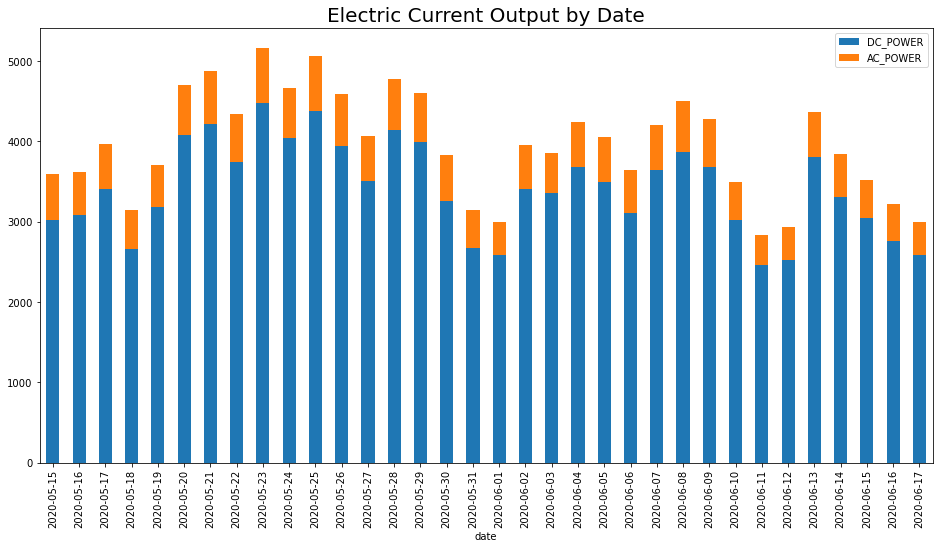

In [167]:
Current_by_Date =  updatedACDC.groupby('date').mean().plot(y=['DC_POWER','AC_POWER'], use_index=True, kind='bar', stacked=True, figsize=(16,8))
plt.title("Electric Current Output by Date", fontsize=20)
plt.show()

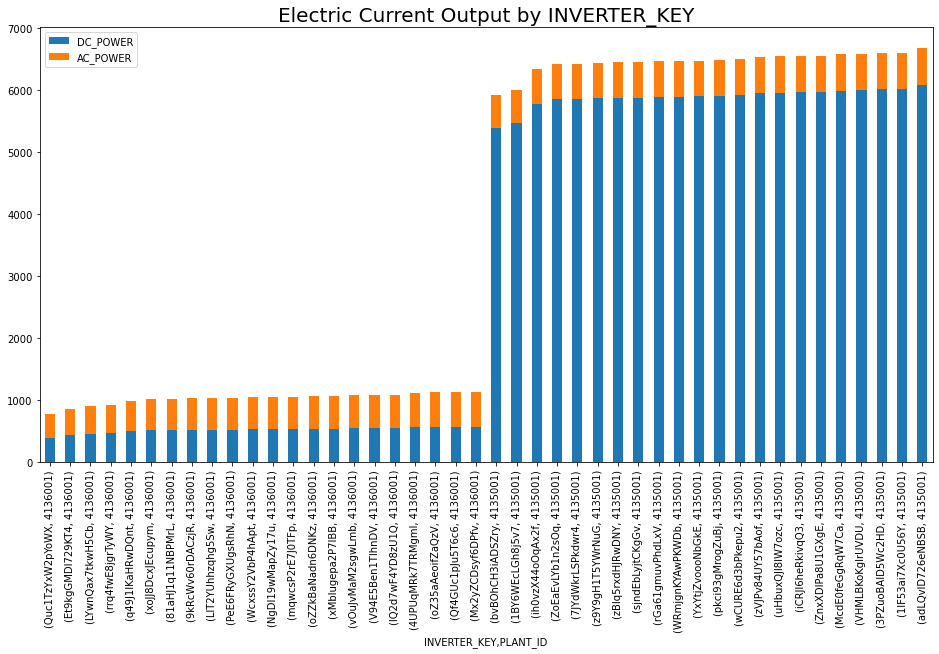

In [168]:
Current_by_Module = updatedACDC.groupby(['INVERTER_KEY','PLANT_ID']).mean().sort_values(by='DC_POWER').plot(y=['DC_POWER','AC_POWER'],
                                                use_index=True, kind='bar',stacked=True, figsize=(16,8))
plt.title("Electric Current Output by INVERTER_KEY", fontsize=20)
plt.show()

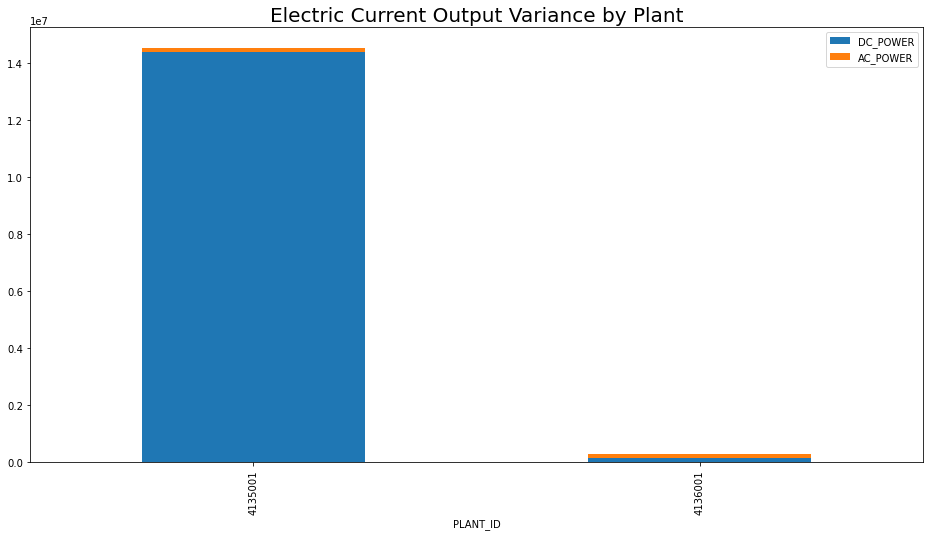

In [170]:
Current_by_Plant = updatedACDC.groupby('PLANT_ID').var().plot(y=['DC_POWER','AC_POWER'], use_index=True, kind='bar', stacked=True, figsize=(16,8))
plt.title("Electric Current Output Variance by Plant", fontsize=20)
plt.show()

In [ ]:
### Using complete Data

In [159]:
GenCombined.groupby('INVERTER_KEY').sum().sort_values(by='TOTAL_YIELD')

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
INVERTER_KEY,,,,,
q49J1IKaHRwDQnt,13479227259,737061.89682,721060.84412,12225421.47049,1402458366.70638
Et9kgGMDl729KT4,13214523195,601396.05098,588615.70810,7528481.34157,5665123000.25402
vOuJvMaM2sgwLmb,13479227259,854172.89424,835012.15524,11452115.46833,7467966092.91522
4UPUqMRk7TRMgml,13214523195,887444.87535,867688.15155,13238235.61496,8072359493.27430
Mx2yZCDsyf6DPfv,13214523195,910617.27081,890317.27032,12172695.54719,8178637488.55305
1IF53ai7Xc0U56Y,12897068119,10062944.37972,984007.15345,10470115.28335,19690516242.07500
ih0vzX44oOqAx2f,12942553130,9695845.32260,948272.43036,10245019.12501,19749066427.68202
adLQvlD726eNBSB,12897068119,10197781.55958,997125.15666,10603621.51190,19969247441.80200
1BY6WEcLGh8j5v7,13041793154,9063715.97494,886665.32607,10189495.80832,20114520998.43001


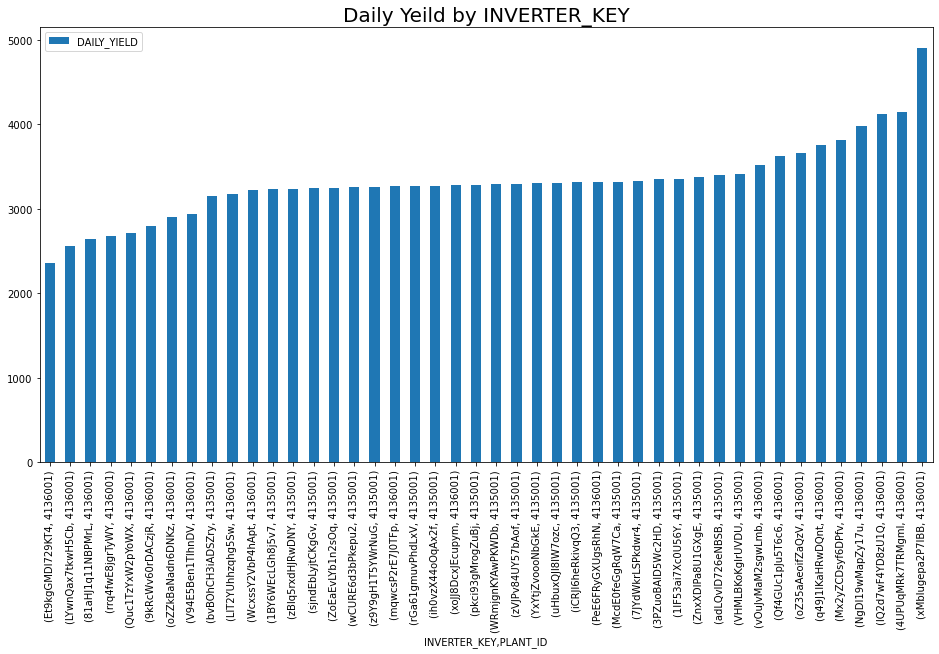

In [179]:
Invert_Daily_Yield = GenCombined.groupby(['INVERTER_KEY','PLANT_ID']).mean().sort_values(by='DAILY_YIELD').plot(y='DAILY_YIELD',
                                                use_index=True, kind='bar',stacked=True, figsize=(16,8))
plt.title("Daily Yeild by INVERTER_KEY", fontsize=20)
plt.show()

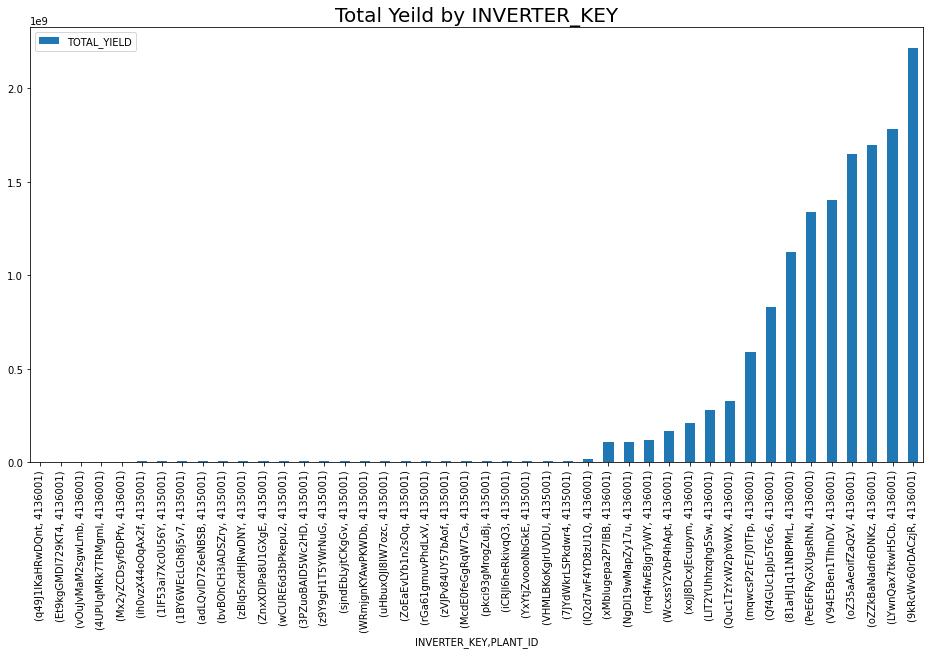

In [178]:
Invert_Total_Yield = GenCombined.groupby(['INVERTER_KEY','PLANT_ID']).mean().sort_values(by='TOTAL_YIELD').plot(y='TOTAL_YIELD',
                                                use_index=True, kind='bar',stacked=True, figsize=(16,8))
plt.title("Total Yeild by INVERTER_KEY", fontsize=20)
plt.show()

#### Observation:


* Current_by_Date:
    * DC rate higher than AC
    * Output variance healthy
* Current_by_Module:
    * Inverters from plant 4135001 has high negative output variance comparing to 4136001. 
* Current_by_Plant
    * As results consistent from Current_by_Module graph.
* Invert_Daily_Yield
    * Daily Yeild result is healthy despite the big variance from Current_by_Module chart.
* Invert_Total_Yield
    * Total Yeild result resonates from Current_by_Module.

## Sensor

In [94]:
plant1_sensor = pd.read_csv('./Resources/Kaggle/Plant_1_Weather_Sensor_Data.csv')
plant1_sensor

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.18432,22.85751,0.00000
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.08459,22.76167,0.00000
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.93575,22.59231,0.00000
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.84613,22.36085,0.00000
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.62153,22.16542,0.00000
...,...,...,...,...,...,...
3177,2020-06-17 22:45:00,4135001,HmiyD2TTLFNqkNe,22.15057,21.48038,0.00000
3178,2020-06-17 23:00:00,4135001,HmiyD2TTLFNqkNe,22.12982,21.38902,0.00000
3179,2020-06-17 23:15:00,4135001,HmiyD2TTLFNqkNe,22.00827,20.70921,0.00000
3180,2020-06-17 23:30:00,4135001,HmiyD2TTLFNqkNe,21.96949,20.73496,0.00000


In [95]:
plant1_sensor['DATE_TIME'] = pd.to_datetime(plant1_sensor['DATE_TIME'],yearfirst=True)

In [96]:
plant2_sensor = pd.read_csv('./Resources/Kaggle/Plant_2_Weather_Sensor_Data.csv')
plant2_sensor

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.00476,25.06079,0.00000
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.88081,24.42187,0.00000
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.68206,24.42729,0.00000
3,2020-05-15 00:45:00,4136001,iq8k7ZNt4Mwm3w0,26.50059,24.42068,0.00000
4,2020-05-15 01:00:00,4136001,iq8k7ZNt4Mwm3w0,26.59615,25.08821,0.00000
...,...,...,...,...,...,...
3254,2020-06-17 22:45:00,4136001,iq8k7ZNt4Mwm3w0,23.51170,22.85620,0.00000
3255,2020-06-17 23:00:00,4136001,iq8k7ZNt4Mwm3w0,23.48228,22.74419,0.00000
3256,2020-06-17 23:15:00,4136001,iq8k7ZNt4Mwm3w0,23.35474,22.49225,0.00000
3257,2020-06-17 23:30:00,4136001,iq8k7ZNt4Mwm3w0,23.29105,22.37391,0.00000


In [97]:
plant2_sensor['DATE_TIME'] = pd.to_datetime(plant2_sensor['DATE_TIME'],yearfirst=True)

In [98]:
SensorCombined = plant2_sensor.merge(plant1_sensor, how="outer")
SensorCombined

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.00476,25.06079,0.00000
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.88081,24.42187,0.00000
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.68206,24.42729,0.00000
3,2020-05-15 00:45:00,4136001,iq8k7ZNt4Mwm3w0,26.50059,24.42068,0.00000
4,2020-05-15 01:00:00,4136001,iq8k7ZNt4Mwm3w0,26.59615,25.08821,0.00000
...,...,...,...,...,...,...
6436,2020-06-17 22:45:00,4135001,HmiyD2TTLFNqkNe,22.15057,21.48038,0.00000
6437,2020-06-17 23:00:00,4135001,HmiyD2TTLFNqkNe,22.12982,21.38902,0.00000
6438,2020-06-17 23:15:00,4135001,HmiyD2TTLFNqkNe,22.00827,20.70921,0.00000
6439,2020-06-17 23:30:00,4135001,HmiyD2TTLFNqkNe,21.96949,20.73496,0.00000


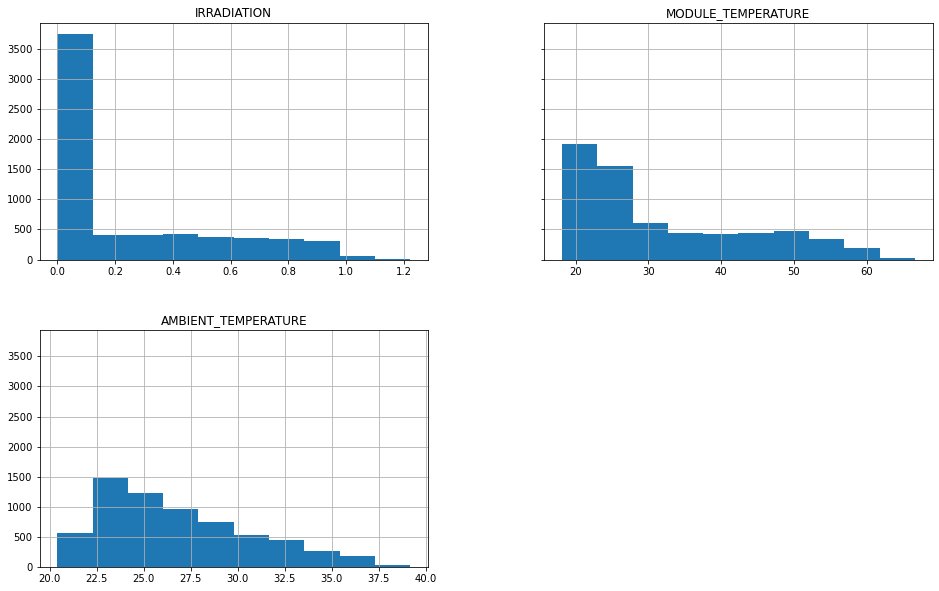

In [138]:
SensorCombined.hist(figsize=(16,10), column=['IRRADIATION','MODULE_TEMPERATURE','AMBIENT_TEMPERATURE'], sharey=True)
plt.show()

In [118]:
i_IRRADIATION = SensorCombined['IRRADIATION'].sort_values()
i_MODULE_TEMPERATURE = SensorCombined['MODULE_TEMPERATURE'].sort_values()
i_AMBIENT_TEMPERATURE = SensorCombined['AMBIENT_TEMPERATURE'].sort_values()

In [119]:
z_scipy = sts.zscore(i_IRRADIATION)
z_scipy2 = sts.zscore(i_MODULE_TEMPERATURE)
z_scipy3 = sts.zscore(i_AMBIENT_TEMPERATURE)


print(f" z-scores for IRRADIATION {z_scipy}")
print(f" z-scores deviation for MODULE_TEMPERATURE {z_scipy2}")
print(f" z-scores deviation for AMBIENT_TEMPERATURE {z_scipy3}")

 z-scores for IRRADIATION [-0.75134045 -0.75134045 -0.75134045 ...  2.90692169  2.99997007
  3.22988305]
 z-scores deviation for MODULE_TEMPERATURE [-1.16623399 -1.15762396 -1.15663078 ...  2.83958314  2.87934659
  2.93170994]
 z-scores deviation for AMBIENT_TEMPERATURE [-1.62930342 -1.62220704 -1.61288581 ...  3.08817172  3.09031402
  3.13968917]


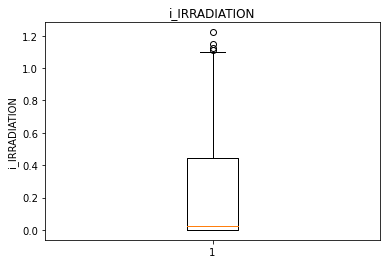

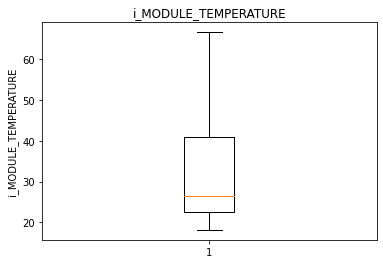

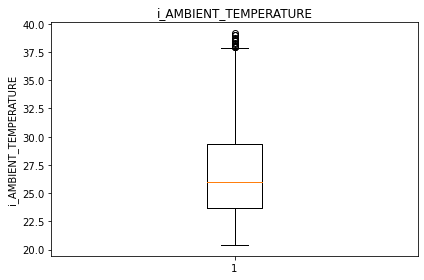

In [136]:
fig1, ax1= plt.subplots()
ax1.set_title('i_IRRADIATION')
ax1.set_ylabel('i_IRRADIATION')
ax1.boxplot(i_IRRADIATION)
fig1, ax2= plt.subplots()
ax2.set_title('i_MODULE_TEMPERATURE')
ax2.set_ylabel('i_MODULE_TEMPERATURE')
ax2.boxplot(i_MODULE_TEMPERATURE)
fig1, ax3= plt.subplots()
ax3.set_title('i_AMBIENT_TEMPERATURE')
ax3.set_ylabel('i_AMBIENT_TEMPERATURE')
ax3.boxplot(i_AMBIENT_TEMPERATURE)
plt.tight_layout()
plt.show()

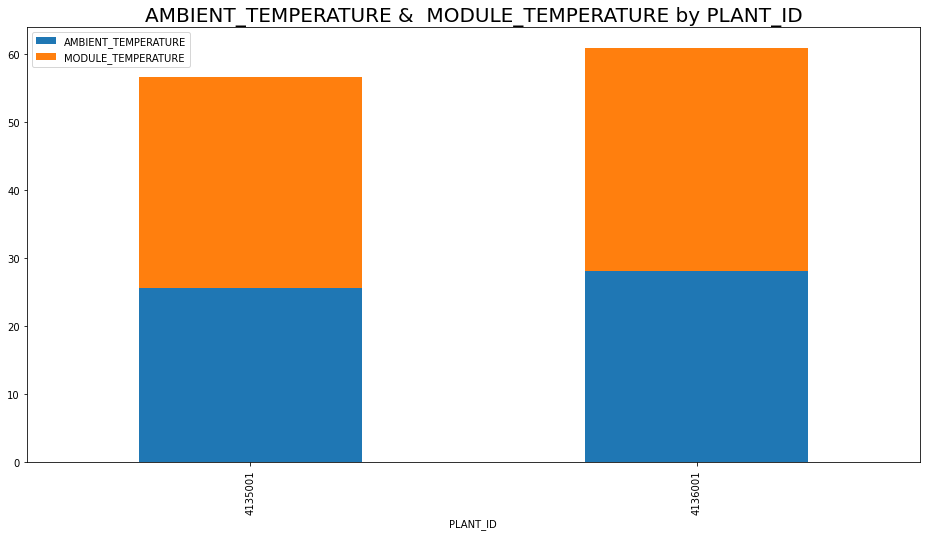

In [185]:
AmbMod_Plant = SensorCombined.groupby(['PLANT_ID']).mean().sort_values(by='AMBIENT_TEMPERATURE').plot(y=['AMBIENT_TEMPERATURE','MODULE_TEMPERATURE'],
                                                use_index=True, kind='bar',stacked=True, figsize=(16,8))
plt.title("AMBIENT_TEMPERATURE &  MODULE_TEMPERATURE by PLANT_ID", fontsize=20)
plt.show()

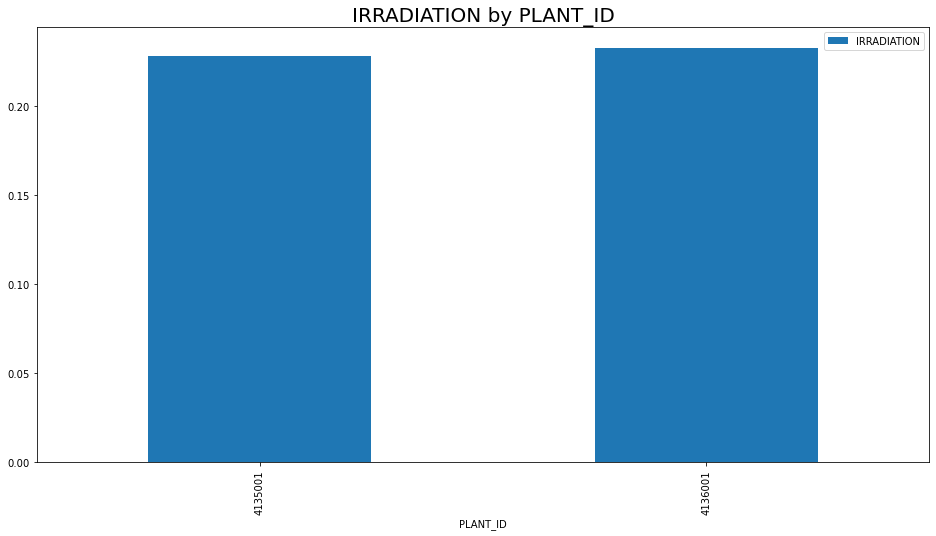

In [186]:
IRRADIATION_Plant = SensorCombined.groupby('PLANT_ID').mean().sort_values(by='IRRADIATION').plot(y=['IRRADIATION'],
                                                use_index=True, kind='bar',stacked=True, figsize=(16,8))
plt.title("IRRADIATION by PLANT_ID", fontsize=20)
plt.show()

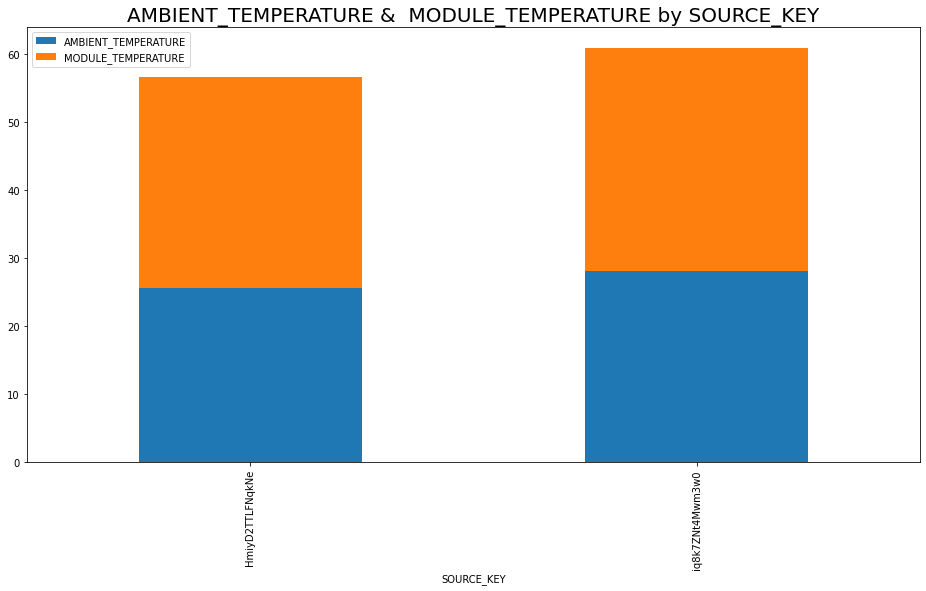

In [188]:
AmbMod_Source = SensorCombined.groupby('SOURCE_KEY').mean().sort_values(by='AMBIENT_TEMPERATURE').plot(y=['AMBIENT_TEMPERATURE','MODULE_TEMPERATURE'],
                                                use_index=True, kind='bar',stacked=True, figsize=(16,8))
plt.title("AMBIENT_TEMPERATURE &  MODULE_TEMPERATURE by SOURCE_KEY", fontsize=20)
plt.show()

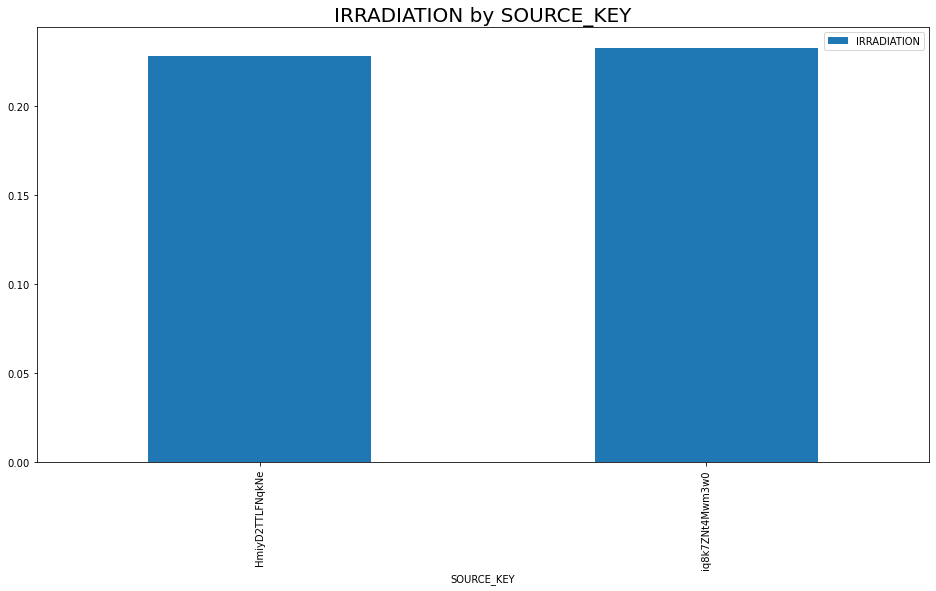

In [196]:
IRRADIATION_Source = SensorCombined.groupby('SOURCE_KEY').mean().sort_values(by='IRRADIATION').plot(y='IRRADIATION',
                                                use_index=True, kind='bar',stacked=True, figsize=(16,8))
plt.title("IRRADIATION by SOURCE_KEY", fontsize=20)
plt.show()

#### Observation:

AmbMod_Plant, IRRADIATION_Source & IRRADIATION_Plant Chart shows Ambiant, IRRADIATION_Plant and Module Temperature from both plants for both Source Key have very low variance.

### Looking for Correlation between 2 Datasets

In [341]:
GenCombined.groupby(['DATE_TIME','PLANT_ID']).mean()

DC_POWER  AC_POWER  DAILY_YIELD     TOTAL_YIELD
DATE_TIME           PLANT_ID                                                 
2020-05-15 00:00:00 4135001    0.00000   0.00000      0.00000   6837222.66667
                    4136001    0.00000   0.00000   2222.72446 644981593.40909
2020-05-15 00:15:00 4135001    0.00000   0.00000      0.00000   6837222.66667
                    4136001    0.00000   0.00000   1290.95455 644981593.40909
2020-05-15 00:30:00 4135001    0.00000   0.00000      0.00000   6837222.66667
...                                ...       ...          ...             ...
2020-06-17 23:15:00 4136001    0.00000   0.00000   4229.09091 645185397.54545
2020-06-17 23:30:00 4135001    0.00000   0.00000   5889.59091   7097397.95455
                    4136001    0.00000   0.00000   4229.09091 645185397.54545
2020-06-17 23:45:00 4135001    0.00000   0.00000   5816.48945   7097397.95455
                    4136001    0.00000   0.00000   4229.09091 645185397.54545

[6417 rows x 4 columns]

In [274]:
TYeild = GenCombined.groupby('DATE_TIME').std().iloc[1:,4].dropna()
DYeild = GenCombined.groupby('DATE_TIME').std().iloc[1:,3].dropna()
DCPower = GenCombined.groupby('DATE_TIME').std().iloc[1:,2].dropna()
ACPower = GenCombined.groupby('DATE_TIME').std().iloc[1:,1].dropna()
PLANTid = GenCombined.groupby('DATE_TIME').std().iloc[1:,0].dropna()

In [342]:
SensorCombined.groupby(['DATE_TIME','PLANT_ID']).mean()

AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
DATE_TIME           PLANT_ID                                            
2020-05-15 00:00:00 4135001              25.18432            22.85751   
                    4136001              27.00476            25.06079   
2020-05-15 00:15:00 4135001              25.08459            22.76167   
                    4136001              26.88081            24.42187   
2020-05-15 00:30:00 4135001              24.93575            22.59231   
...                                           ...                 ...   
2020-06-17 23:15:00 4136001              23.35474            22.49225   
2020-06-17 23:30:00 4135001              21.96949            20.73496   
                    4136001              23.29105            22.37391   
2020-06-17 23:45:00 4135001              21.90929            20.42797   
                    4136001              23.20287            22.53591   

                              IRRADIATION  
DATE_TIME           PLANT_ID               
2020-05-15 00:00:00 4135001       0.00000  
                    4136001       0.00000  
2020-05-15 00:15:00 4135001       0.00000  
                    4136001       0.00000  
2020-05-15 00:30:00 4135001       0.00000  
...                                   ...  
2020-06-17 23:15:00 4136001       0.00000  
2020-06-17 23:30:00 4135001       0.00000  
                    4136001       0.00000  
2020-06-17 23:45:00 4135001       0.00000  
                    4136001       0.00000  

[6441 rows x 3 columns]

In [343]:
IRRADIATION_i = SensorCombined.groupby('DATE_TIME').max().iloc[:,4].dropna()
ModuleTemp = SensorCombined.groupby('DATE_TIME').max().iloc[:,3].dropna()
AmbienTemp = SensorCombined.groupby('DATE_TIME').max().iloc[:,2].dropna()
SOURCEkey = SensorCombined.groupby('DATE_TIME').max().iloc[:,1].dropna()

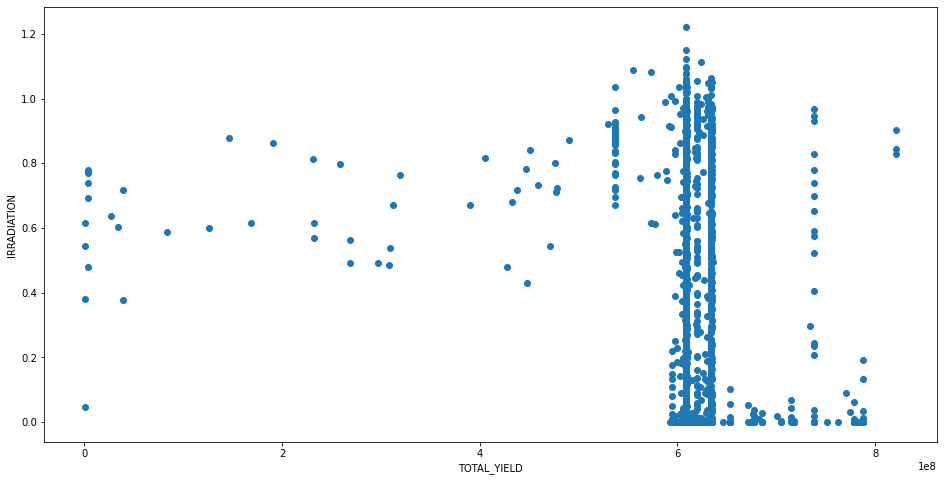

In [344]:
plt.figure(figsize=(16,8))
plt.scatter(TYeild,IRRADIATION_i)
plt.xlabel('TOTAL_YIELD')
plt.ylabel('IRRADIATION')
plt.show()

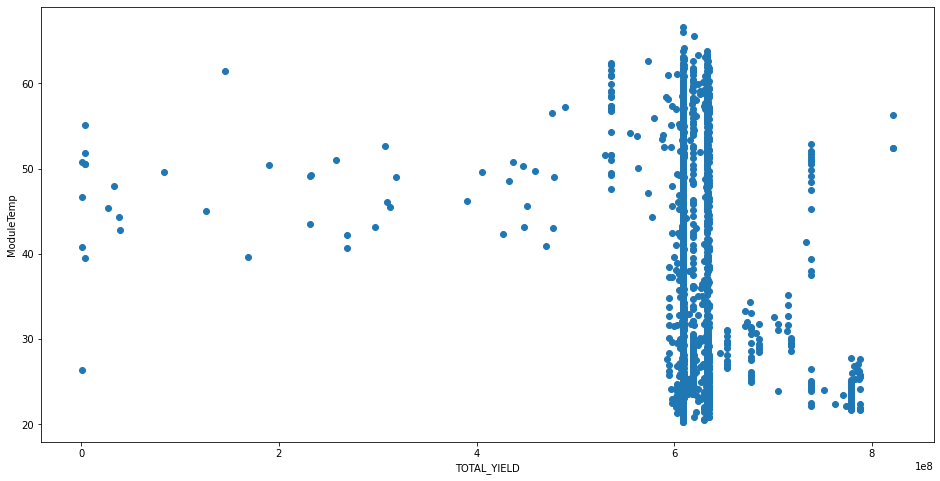

In [345]:
plt.figure(figsize=(16,8))
plt.scatter(TYeild,ModuleTemp)
plt.xlabel('TOTAL_YIELD')
plt.ylabel('ModuleTemp')
plt.show()

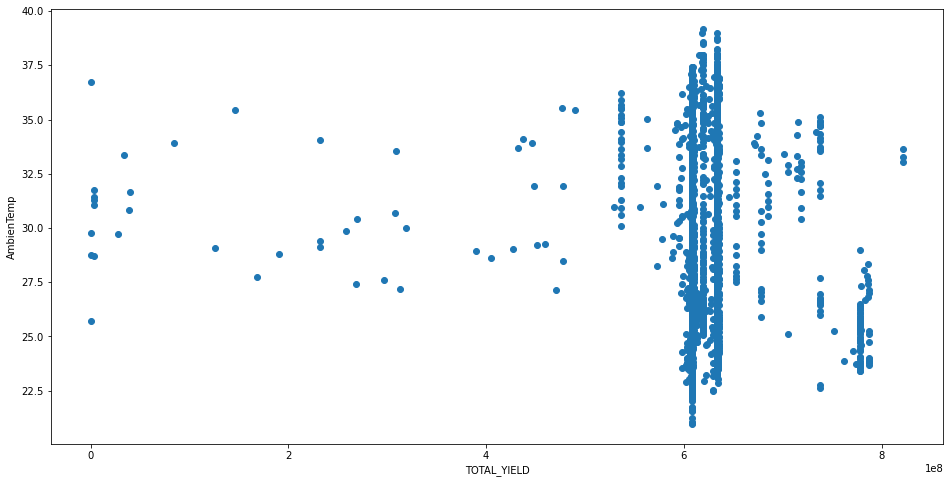

In [346]:
plt.figure(figsize=(16,8))
plt.scatter(TYeild,AmbienTemp)
plt.xlabel('TOTAL_YIELD')
plt.ylabel('AmbienTemp')
plt.show()

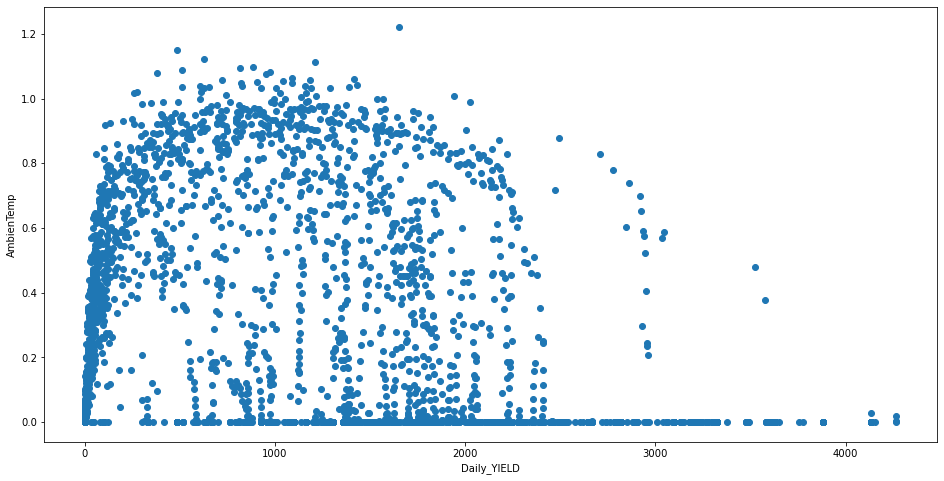

In [347]:
plt.figure(figsize=(16,8))
plt.scatter(DYeild,IRRADIATION_i)
plt.xlabel('Daily_YIELD')
plt.ylabel('AmbienTemp')
plt.show()

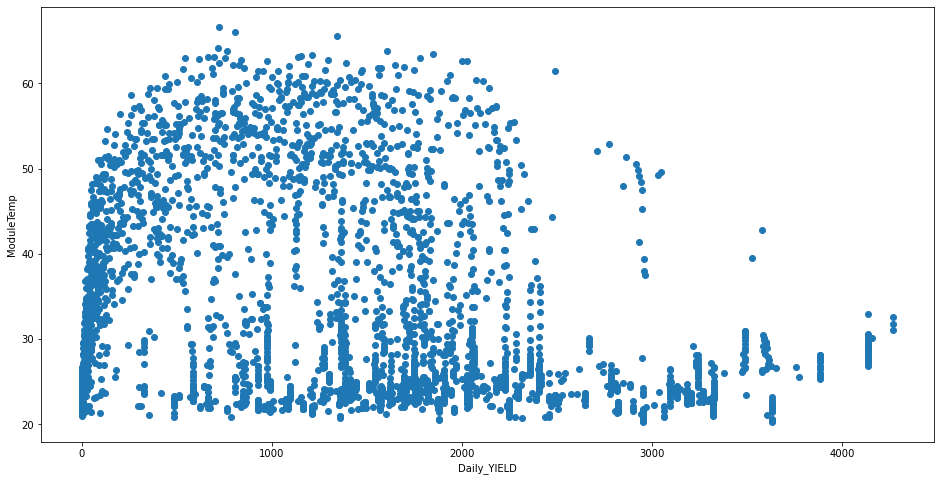

In [348]:
plt.figure(figsize=(16,8))
plt.scatter(DYeild,ModuleTemp)
plt.xlabel('Daily_YIELD')
plt.ylabel('ModuleTemp')
plt.show()

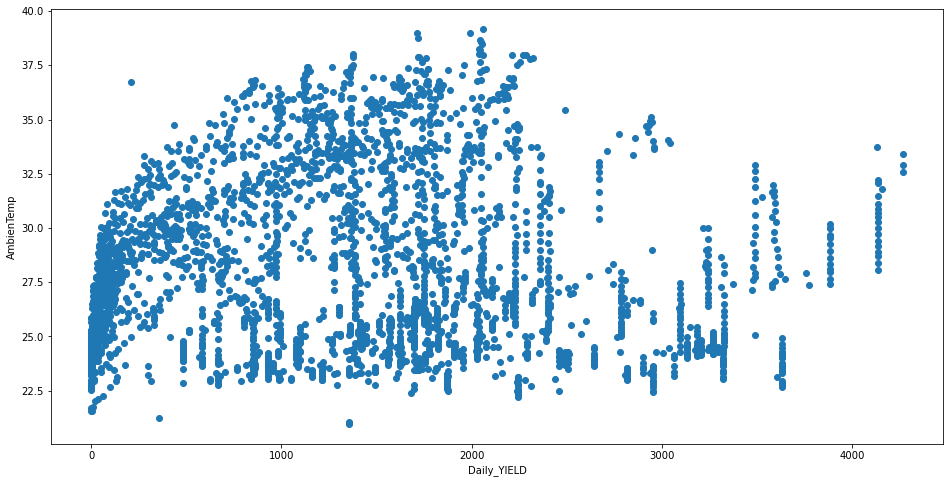

In [349]:
plt.figure(figsize=(16,8))
plt.scatter(DYeild,AmbienTemp)
plt.xlabel('Daily_YIELD')
plt.ylabel('AmbienTemp')
plt.show()

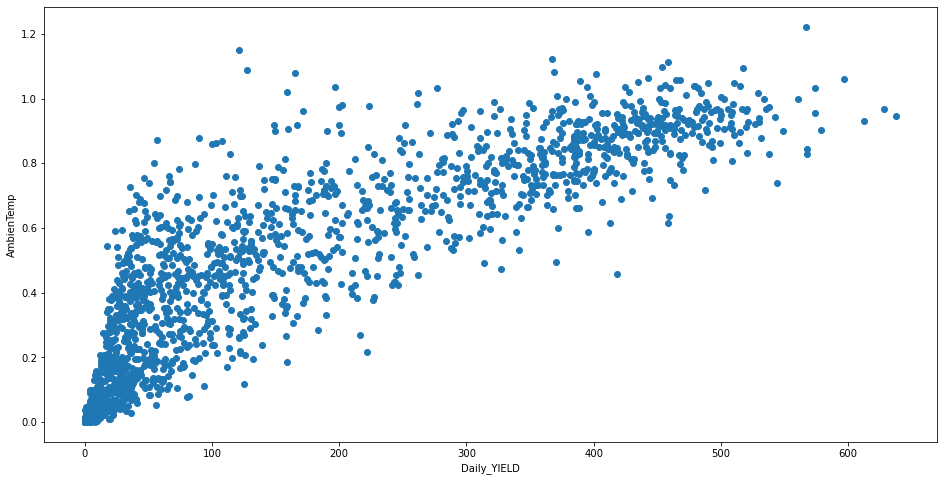

In [350]:
plt.figure(figsize=(16,8))
plt.scatter(DCPower,IRRADIATION_i)
plt.xlabel('Daily_YIELD')
plt.ylabel('AmbienTemp')
plt.show()

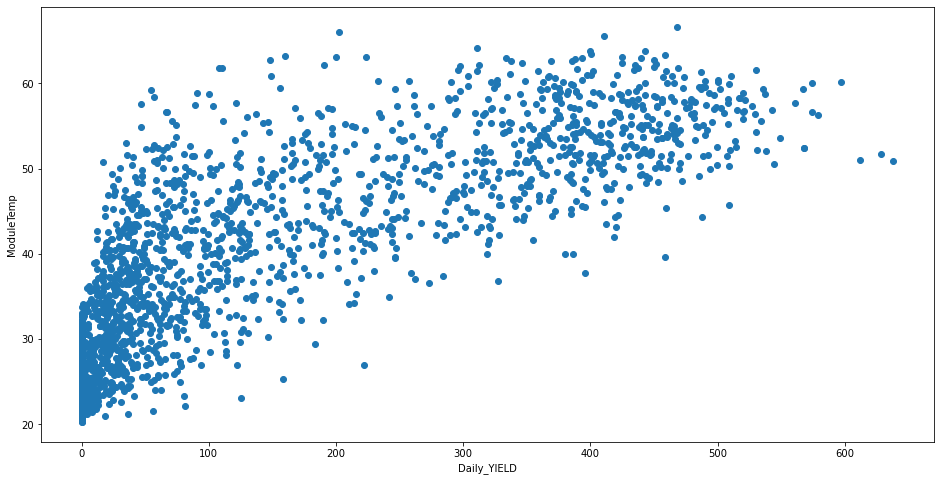

In [351]:
plt.figure(figsize=(16,8))
plt.scatter(DCPower,ModuleTemp)
plt.xlabel('Daily_YIELD')
plt.ylabel('ModuleTemp')
plt.show()

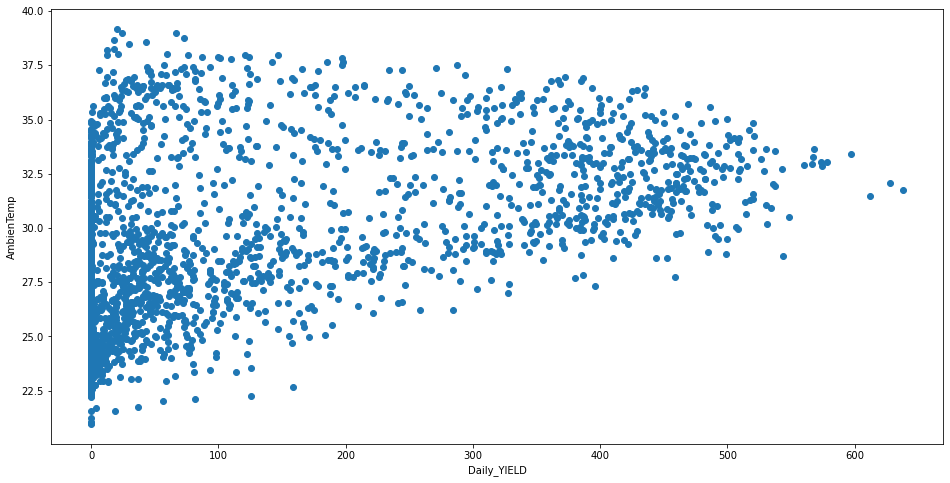

In [352]:
plt.figure(figsize=(16,8))
plt.scatter(DCPower,AmbienTemp)
plt.xlabel('Daily_YIELD')
plt.ylabel('AmbienTemp')
plt.show()

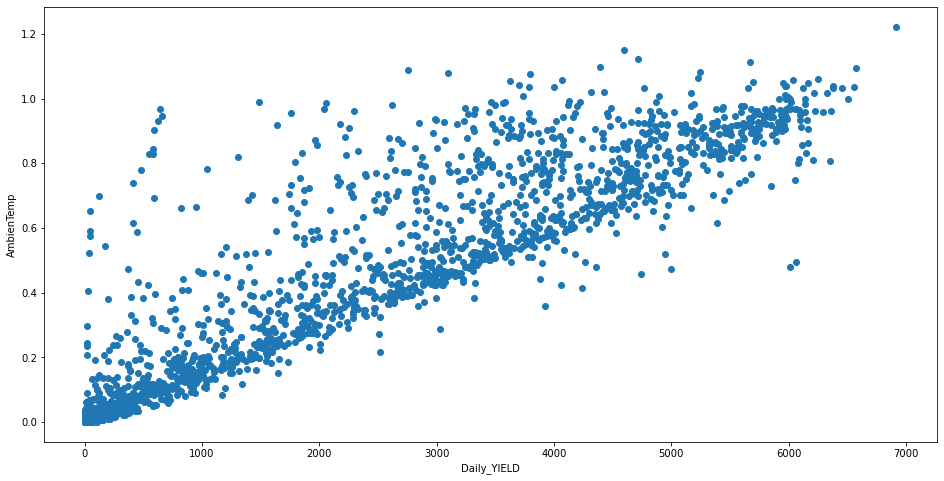

In [353]:
plt.figure(figsize=(16,8))
plt.scatter(ACPower,IRRADIATION_i)
plt.xlabel('Daily_YIELD')
plt.ylabel('AmbienTemp')
plt.show()

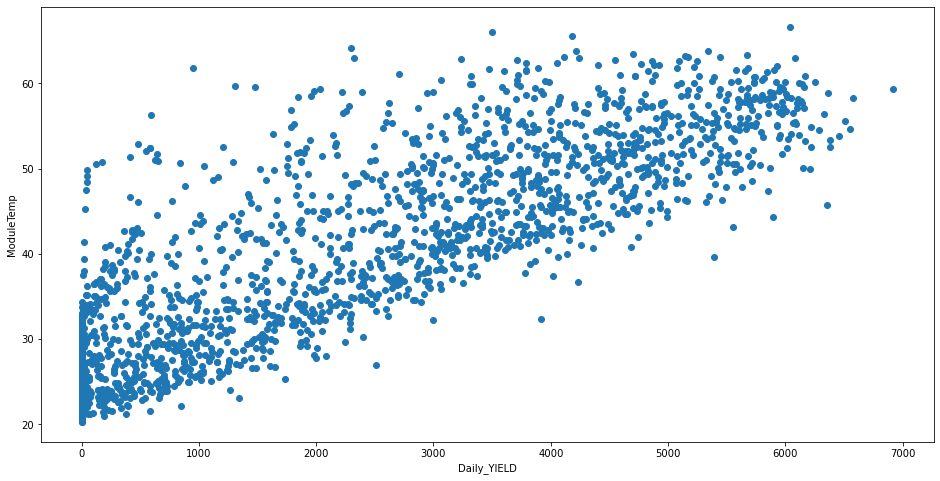

In [354]:
plt.figure(figsize=(16,8))
plt.scatter(ACPower,ModuleTemp)
plt.xlabel('Daily_YIELD')
plt.ylabel('ModuleTemp')
plt.show()

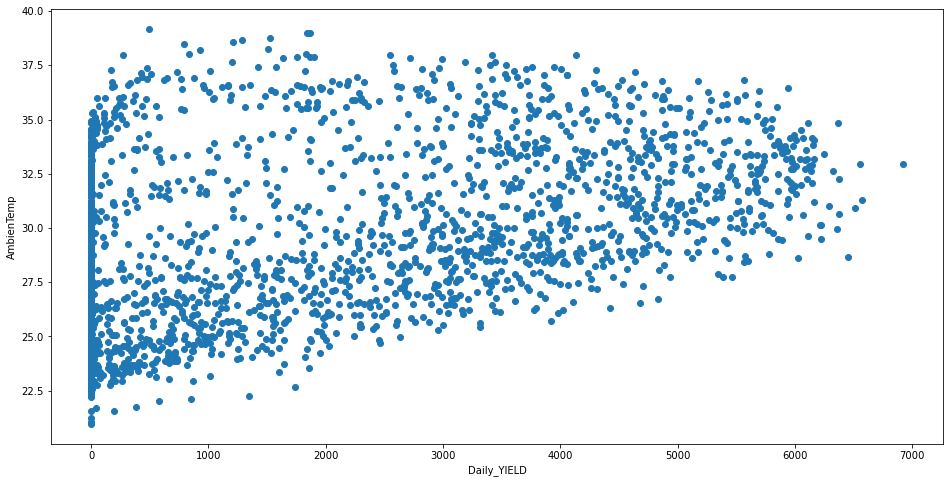

In [355]:
plt.figure(figsize=(16,8))
plt.scatter(ACPower,AmbienTemp)
plt.xlabel('Daily_YIELD')
plt.ylabel('AmbienTemp')
plt.show()

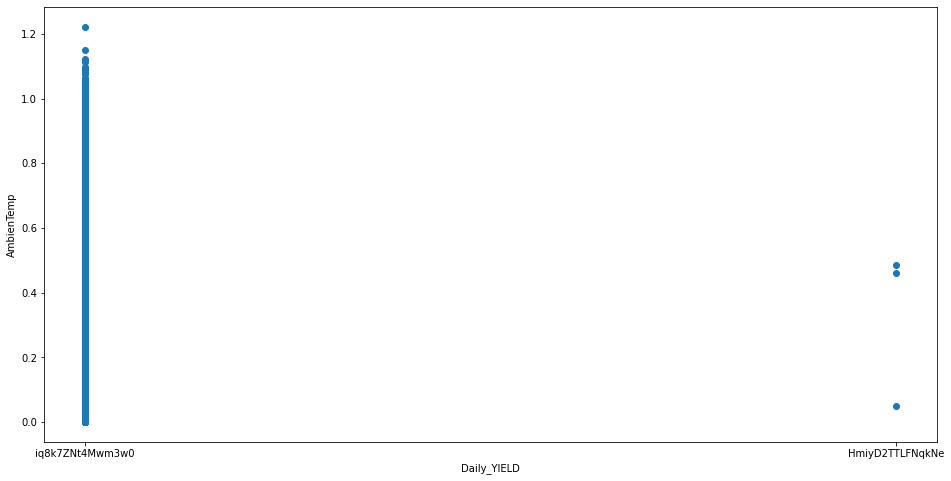

In [356]:
plt.figure(figsize=(16,8))
plt.scatter(SOURCEkey,IRRADIATION_i)
plt.xlabel('Daily_YIELD')
plt.ylabel('AmbienTemp')
plt.show()

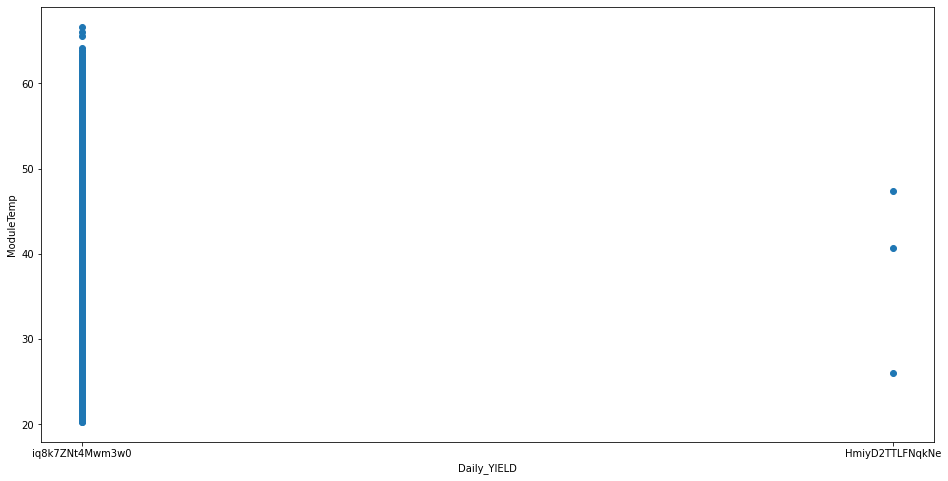

In [357]:
plt.figure(figsize=(16,8))
plt.scatter(SOURCEkey,ModuleTemp)
plt.xlabel('Daily_YIELD')
plt.ylabel('ModuleTemp')
plt.show()

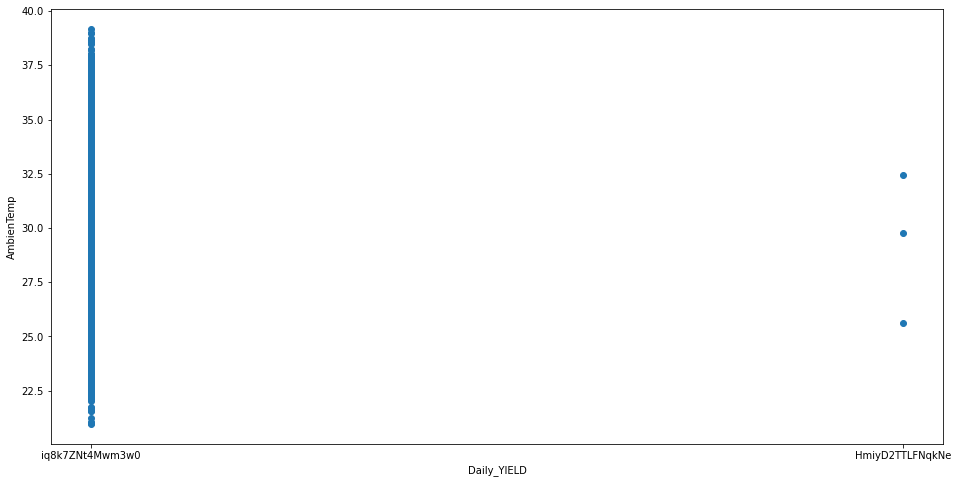

In [340]:
plt.figure(figsize=(16,8))
plt.scatter(SOURCEkey,AmbienTemp)
plt.xlabel('Daily_YIELD')
plt.ylabel('AmbienTemp')
plt.show()

In [292]:
GenCombined

,DATE_TIME,PLANT_ID,INVERTER_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.00000,0.00000,9425.00000,2429011.00000
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.00000,0.00000,0.00000,1215278736.00000
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.00000,0.00000,3075.33333,2247719577.00000
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.00000,0.00000,269.93333,1704250.00000
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.00000,0.00000,3177.00000,19941526.00000
...,...,...,...,...,...,...,...
136471,2020-06-17 23:45:00,4135001,uHbuxQJl8lW7ozc,0.00000,0.00000,5967.00000,7287002.00000
136472,2020-06-17 23:45:00,4135001,wCURE6d3bPkepu2,0.00000,0.00000,5147.62500,7028601.00000
136473,2020-06-17 23:45:00,4135001,z9Y9gH1T5YWrNuG,0.00000,0.00000,5819.00000,7251204.00000
136474,2020-06-17 23:45:00,4135001,zBIq5rxdHJRwDNY,0.00000,0.00000,5817.00000,6583369.00000


In [293]:
SensorCombined

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.00476,25.06079,0.00000
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.88081,24.42187,0.00000
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.68206,24.42729,0.00000
3,2020-05-15 00:45:00,4136001,iq8k7ZNt4Mwm3w0,26.50059,24.42068,0.00000
4,2020-05-15 01:00:00,4136001,iq8k7ZNt4Mwm3w0,26.59615,25.08821,0.00000
...,...,...,...,...,...,...
6436,2020-06-17 22:45:00,4135001,HmiyD2TTLFNqkNe,22.15057,21.48038,0.00000
6437,2020-06-17 23:00:00,4135001,HmiyD2TTLFNqkNe,22.12982,21.38902,0.00000
6438,2020-06-17 23:15:00,4135001,HmiyD2TTLFNqkNe,22.00827,20.70921,0.00000
6439,2020-06-17 23:30:00,4135001,HmiyD2TTLFNqkNe,21.96949,20.73496,0.00000


ValueError: x and y must be the same size

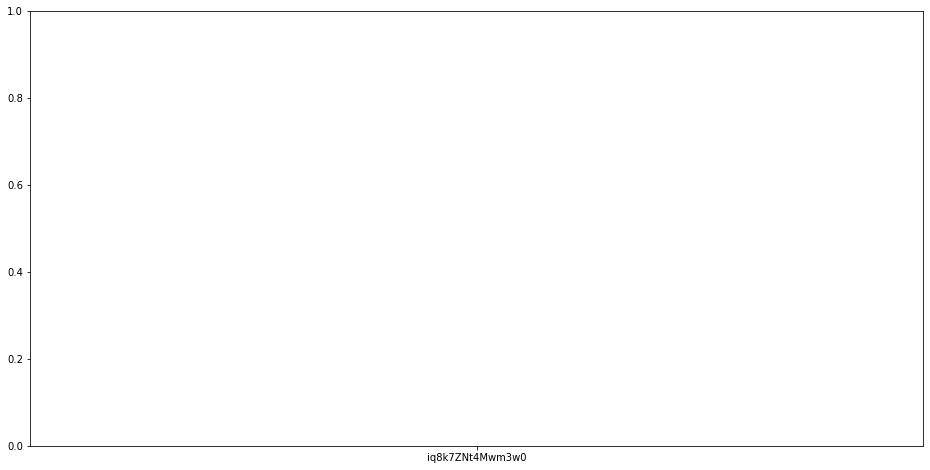

In [307]:
plt.figure(figsize=(16,8))
plt.scatter(SensorCombined.SOURCE_KEY,GenCombined.AC_POWER)
plt.xlabel('Daily_YIELD')
plt.ylabel('AmbienTemp')
plt.show()